## 나스닥 가격 크롤링

### 휴장으로 인한 missing values(dates, prices) 가 있는 데이터 

In [27]:
import requests 
from bs4 import BeautifulSoup 
import datetime
import time

URL_TEMPLATE = 'https://finance.yahoo.com/quote/%5EIXIC/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=tru'

headers = {'User-Agent': 'Mozilla/5.0'}
interval = datetime.timedelta(days=100)
start_date = datetime.datetime(2018, 2, 22)
end_date = datetime.datetime(2023, 2, 21)

ranges = []
while start_date <= end_date:
    range_start = int(start_date.timestamp())
    range_end = int((start_date + interval).timestamp())
    ranges.append((range_start, range_end))
    start_date += interval
ranges[-1] = (ranges[-1][0], int(end_date.timestamp()))

nasdaq_list = []

for period1, period2 in ranges:
    url = URL_TEMPLATE.format(period1, period2)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser') 
    results = soup.select('tbody tr')

    for result in results:
        date = result.select_one('td:nth-child(1)').text
        price = result.select_one('td:nth-child(5)').text

        nasdaq_list.append({
            'date': date,
            'price': price
        })

    time.sleep(5)

nasdaq_list_sorted = sorted(nasdaq_list, key=lambda x: datetime.datetime.strptime(x['date'], '%b %d, %Y')) 
print(nasdaq_list_sorted)

[{'date': 'Feb 21, 2018', 'price': '7,218.23'}, {'date': 'Feb 22, 2018', 'price': '7,210.09'}, {'date': 'Feb 23, 2018', 'price': '7,337.39'}, {'date': 'Feb 26, 2018', 'price': '7,421.46'}, {'date': 'Feb 27, 2018', 'price': '7,330.35'}, {'date': 'Feb 28, 2018', 'price': '7,273.01'}, {'date': 'Mar 01, 2018', 'price': '7,180.56'}, {'date': 'Mar 02, 2018', 'price': '7,257.87'}, {'date': 'Mar 05, 2018', 'price': '7,330.71'}, {'date': 'Mar 06, 2018', 'price': '7,372.01'}, {'date': 'Mar 07, 2018', 'price': '7,396.65'}, {'date': 'Mar 08, 2018', 'price': '7,427.95'}, {'date': 'Mar 09, 2018', 'price': '7,560.81'}, {'date': 'Mar 12, 2018', 'price': '7,588.32'}, {'date': 'Mar 13, 2018', 'price': '7,511.01'}, {'date': 'Mar 14, 2018', 'price': '7,496.81'}, {'date': 'Mar 15, 2018', 'price': '7,481.74'}, {'date': 'Mar 16, 2018', 'price': '7,481.99'}, {'date': 'Mar 19, 2018', 'price': '7,344.24'}, {'date': 'Mar 20, 2018', 'price': '7,364.30'}, {'date': 'Mar 21, 2018', 'price': '7,345.29'}, {'date': 'Ma

### missing values 를 전날 가격으로 대체한 데이터

In [42]:
nasdaq_list_modified = []

last_nasdaq_price = None

for bitcoin in bitcoin_list_modified:
    date = bitcoin['date']
    
    for nasdaq in nasdaq_list_sorted:
        if nasdaq['date'] == date:
            last_nasdaq_price = nasdaq['price']
            break
    
    if last_nasdaq_price is None:
        nasdaq_list_modified.append({
            'date': date,
            'price': last_nasdaq_price
        })
    else:
        nasdaq_list_modified.append({
            'date': date,
            'price': last_nasdaq_price
        })

nasdaq_list_modified_sorted = nasdaq_list_modified[0:1836] 


In [43]:
import json

# 파일에 저장할 데이터
data = {'nasdaq_list': nasdaq_list_modified_sorted}

# 파일에 데이터를 쓰기
with open('nasdaq_data.json', 'w') as f:
    json.dump(data, f)

In [44]:
import json

# 파일에서 데이터를 읽어오기
with open('nasdaq_data.json', 'r') as f:
    data = json.load(f)

# 데이터 사용하기
nasdaq_list_modified_sorted = data['nasdaq_list']

In [45]:
nasdaq_prices_sorted = [item['price'] for item in nasdaq_list_modified_sorted]

In [46]:
nasdaq_dates_sorted = [item['date'] for item in nasdaq_list_modified_sorted]

## 비트코인 가격 크롤링

In [36]:
import requests 
from bs4 import BeautifulSoup 
import datetime
import time

URL_TEMPLATE = 'https://finance.yahoo.com/quote/BTC-USD/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'

headers = {'User-Agent': 'Mozilla/5.0'}
interval = datetime.timedelta(days=100)
start_date = datetime.datetime(2018, 2, 21)
end_date = datetime.datetime(2023, 2, 22)

ranges = []
while start_date <= end_date:
    range_start = int(start_date.timestamp())
    range_end = int((start_date + interval).timestamp())
    ranges.append((range_start, range_end))
    start_date += interval
ranges[-1] = (ranges[-1][0], int(end_date.timestamp()))

bitcoin_list = []

for period1, period2 in ranges:
    url = URL_TEMPLATE.format(period1, period2)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser') 
    results = soup.select('tbody tr')

    for result in results:
        date = result.select_one('td:nth-child(1)').text
        price = result.select_one('td:nth-child(5)').text

        bitcoin_list.append({
            'date': date,
            'price': price
        })

    time.sleep(5)

bitcoin_list_sorted = sorted(bitcoin_list, key=lambda x: datetime.datetime.strptime(x['date'], '%b %d, %Y'))

In [41]:
bitcoin_list_modified = []

for data in bitcoin_list_sorted:
    bitcoin_list_modified.append({
        'date': data['date'],
        'price': ''
    })

In [37]:
import json

# 파일에 저장할 데이터
data = {'bitcoin_list': bitcoin_list_sorted}

# 파일에 데이터를 쓰기
with open('bitcoin_data.json', 'w') as f:
    json.dump(data, f)

In [38]:
import json

# 파일에서 데이터를 읽어오기
with open('bitcoin_data.json', 'r') as f:
    data = json.load(f)

# 데이터 사용하기
bitcoin_list_sorted = data['bitcoin_list']

In [39]:
bitcoin_dates_sorted = [item['date'] for item in bitcoin_list_sorted]

In [40]:
bitcoin_prices_sorted = [item['price'] for item in bitcoin_list_sorted]

## 한번에 두개 그래프 그리기 
### x 축은 날짜, y1은 비트코인 가격, y2은 나스닥 가격

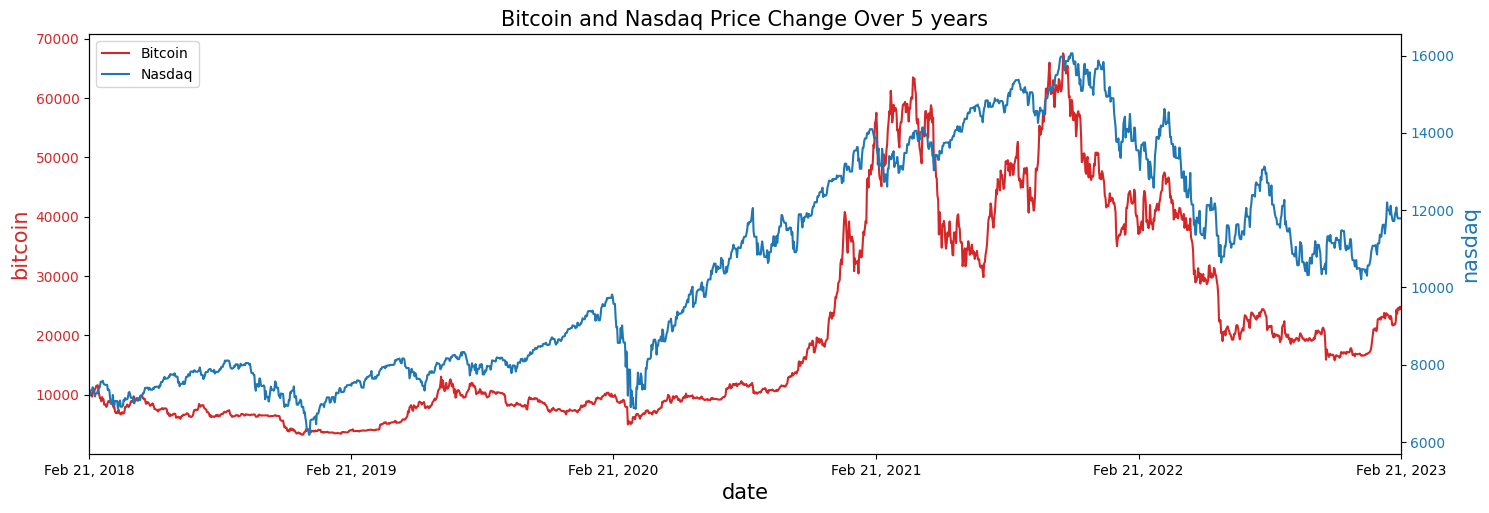

In [50]:
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd

bitcoin_df = pd.DataFrame(bitcoin_list_sorted)
nasdaq_df = pd.DataFrame(nasdaq_list_modified_sorted)

x = bitcoin_df['date']
y1 = bitcoin_df['price']
y2 = nasdaq_df['price']

y1 = y1.str.replace(',', '', regex=True).astype('float')
y2 = y2.str.replace(',', '', regex=True).astype('float')

# 그래프 사이즈 조정 
fig, ax1 = plt.subplots(figsize=(15,5)) 

# x축, y1 비트코인 그래프 설정 
color = 'tab:red'
ax1.set_xlabel('date', fontsize = 15)
ax1.set_ylabel('bitcoin', fontsize = 15, color=color)
ax1.plot(x, y1, color=color, label='Bitcoin')
ax1.tick_params(axis='y', labelcolor=color)


ax1.set_yticks(np.arange(3000, 65000, 10000))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10000))

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('nasdaq', fontsize = 15, color=color) 
ax2.plot(x, y2, color=color, label='Nasdaq')
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_yticks(np.arange(6000, 16000, 2000))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2000))

#범례 추가 
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()  

#눈금 설정 
ax1.set_xlim(bitcoin_dates_sorted[0], bitcoin_dates_sorted[-1])
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.title('Bitcoin and Nasdaq Price Change Over 5 years', fontsize=15) 
plt.show() 

